In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

In [6]:
dataset_dir = 'dataset/supervisely_person'

In [7]:
path = glob(os.path.join(dataset_dir, 'images', "*.png"))
mask_path = glob(os.path.join(dataset_dir, 'masks', "*.png"))

# 학습데이터 개수

In [20]:
print('number of images: ', len(path))
print('number of masks: ', len(mask_path))

number of images:  2667
number of masks:  2667


# 학습데이터 샘플

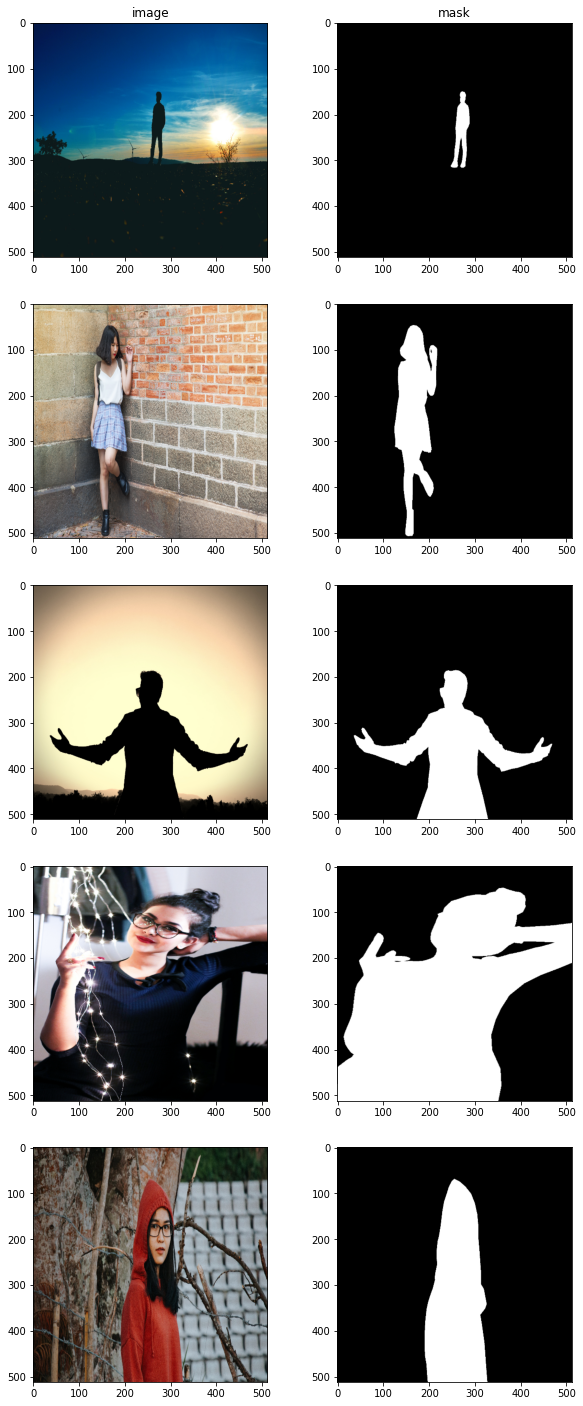

In [31]:
ROW = 5
fig, axs = plt.subplots(ROW, 2, figsize=(10, 25))
for idx in range(ROW):
    img = cv2.imread(path[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    mask = cv2.imread(mask_path[idx])
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    
    axs[idx][0].imshow(img)
    axs[idx][1].imshow(mask)
    
    if idx == 0:
        axs[idx][0].set_title('image')
        axs[idx][1].set_title('mask')

# 모델 학습
* --data-path 학습 데이터셋의 이미지 폴더 위치 지정 (폴더에 내부에 'images', 'masks' 폴더로 데이터가 저장되어 있어야함)
* --num-epochs 학습 횟수
* --batch-size 배치 사이즈
* --lr 런닝레이트 지정
* --checkpoints-path 모델 저장 위치
    * 10 epoch 단위로 model_epoch_{EPOCH_INDEX}.pt 파일로 저장
    * 마지막 학습 결과는 model_epoch_latest.pt 라는 이름으로 저장됨

In [53]:
!python3 model/pytorch/unet/train.py \
--data-path='dataset/supervisely_person' \
--batch-size=16 \
--lr='0.00001' \
--num-epochs=2 \
--checkpoints-path='check_points/unet'

Namespace(batch_size=16, checkpoints_path='check_points/unet', data_path='dataset/supervisely_person', lr=1e-05, num_epochs=2)
images Loading: 2667it [00:16, 166.46it/s]
masks Loading: 2667it [00:07, 375.17it/s]
2022-11-21 08:49:15,417 - trn: 2133, val: 534
2022-11-21 08:49:16,140 - Load on cuda
2022-11-21 08:49:18,752 - loaded model (params 5685495)
2022-11-21 08:49:18,753 - epoch 1
100%|#########################################| 134/134 [00:22<00:00,  6.06it/s]
2022-11-21 08:49:40,883 - trn, duration:  22.1s, acc:104829.8281, loss:0.0006
100%|###########################################| 34/34 [00:01<00:00, 19.84it/s]
2022-11-21 08:49:42,610 - val, duration:   1.7s, acc:124151.2109, loss:0.0026
model/pytorch/unet/train.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img.reshape(1,3,256,256)).to(device)
Figure(1

# 모델 예측
* --data-path 테스트 데이터셋의 위치 지정
* --model-path 로드할 모델의 위치
* --save 결과 저장 여부
* --checkpoints-path 저장 폴더 위치

In [84]:
!python3 model/pytorch/unet/predict.py \
--data-path='dataset/supervisely_person/test_data_list.txt' \
--model-path='check_points/unet/model_state_dict_76_best.pt' \
--checkpoints-path='check_points/unet' \
--save=True

2022-11-21 11:49:57,956 - Namespace(checkpoints_path='check_points/unet', data_path='dataset/supervisely_person/test_data_list.txt', display=False, model_path='check_points/unet/model_state_dict_76_best.pt', save=True)
2022-11-21 11:49:57,956 - model loading.. check_points/unet/model_state_dict_76_best.pt
2022-11-21 11:49:57,956 - dataset loading..
2022-11-21 11:49:57,956 - start inferencing
2022-11-21 11:50:01,376 - number of test dataset : 534
100%|########################################| 534/534 [00:04<00:00, 112.42it/s]
2022-11-21 11:50:06,135 - 1/534 - ds5_pexels-photo-245241.png,  fps: 0.0, dice loss: 0.1
2022-11-21 11:50:06,243 - 2/534 - ds8_pexels-photo-66152_GX5RTeXShS.png,  fps: 8.9, dice loss: 0.0
2022-11-21 11:50:06,343 - 3/534 - ds6_light-red-white-home.png,  fps: 10.0, dice loss: 0.0
2022-11-21 11:50:06,444 - 4/534 - ds6_pexels-photo-756439.png,  fps: 9.9, dice loss: 0.1
2022-11-21 11:50:06,542 - 5/534 - ds6_pexels-photo-819398.png,  fps: 10.2, dice loss: 0.1
2022-11-21 

In [85]:
import matplotlib.pyplot as plt
import cv2

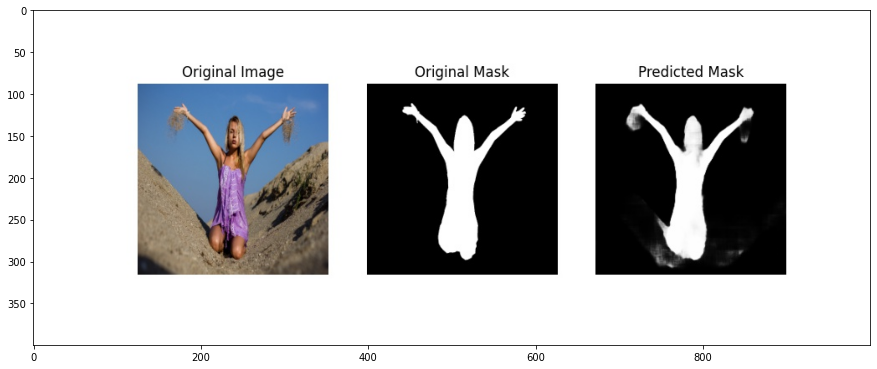

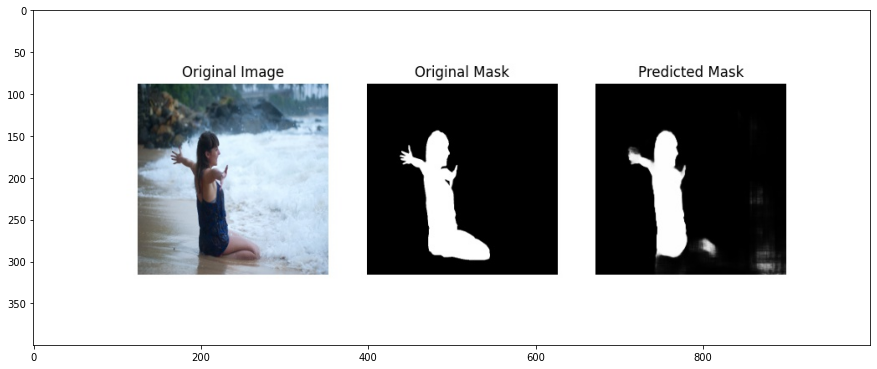

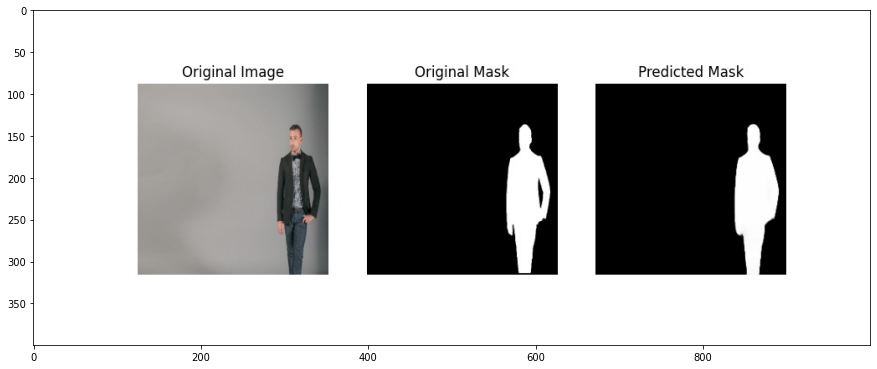

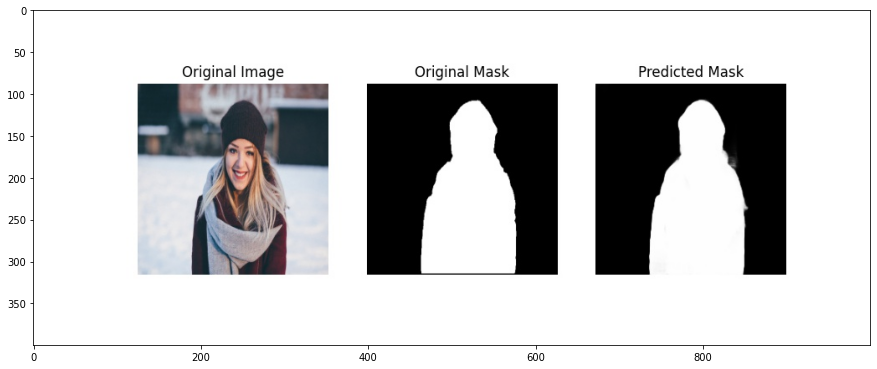

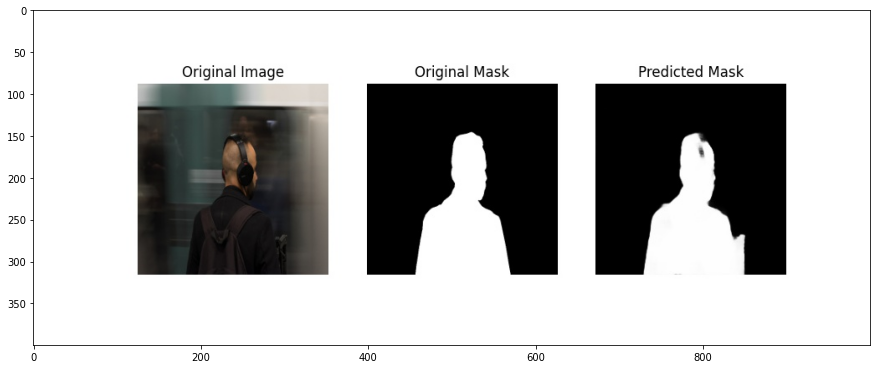

In [86]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(cv2.imread('check_points/unet/val/109.jpg'), cv2.COLOR_BGR2RGB))
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(cv2.imread('check_points/unet/val/133.jpg'), cv2.COLOR_BGR2RGB))
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(cv2.imread('check_points/unet/val/13.jpg'), cv2.COLOR_BGR2RGB))
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(cv2.imread('check_points/unet/val/144.jpg'), cv2.COLOR_BGR2RGB))
plt.show()
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(cv2.imread('check_points/unet/val/500.jpg'), cv2.COLOR_BGR2RGB))
plt.show()